In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:80% !important;}
div.prompt {min-width:70px;}
div#toc-header{margin-top:150px;}
span.toc-item-num{display:none;}
div.CodeMirror {font-family:Consolas}
div.input {font-family:Consolas}
</style>
"""))

<b><font color='red' size='6'>ch11. N차원 배열 다루기</font></b>
 - [numpy](https://numpy.org/)
 - [numpy docs](https://numpy.org/doc/stable/)
 - N차원 배열 객체(동일자료형)
 - 2차원 배열은 행렬 개념으로 이해
 - numpy 패키지를 이용(C언어로 구현된 고성능 수치계산 패키지)

# 1절. 넘파이 패키지

In [2]:
import numpy as np
np.__version__

'1.23.5'

In [3]:
# 배열 만들기
a = np.arange(15)  # 0부터 15앞 까지 1씩 증가하는 1차원 배열
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [4]:
from numpy import arange
a = arange(15).reshape(3, 5)  # 3행 5열짜리 2차원 배열
# print(a)  # print()로 감싸면 앞에 array가 사라짐
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [5]:
type(a)  # a배열 변수의 타입

numpy.ndarray

In [6]:
a.dtype  # a배열 변수의 요소들의 타입

dtype('int32')

In [7]:
a.dtype.name

'int32'

In [8]:
a.itemsize  # 한 요소의 bytesize (int32의 경우 : 4byte(32bit))

4

In [9]:
a.ndim  # 축수(차원수)

2

In [10]:
a.size  # 배열 요소의 갯수

15

In [11]:
a.shape  # 배열의 구조(3행 5열)

(3, 5)

In [12]:
print('shape 조정 전 a : \n', a)
a.shape = (5, 3)
print('shape 수정 후 a : \n', a)

shape 조정 전 a : 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
shape 수정 후 a : 
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [21]:
# 배열 요소의 타입을 수정
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [22]:
a.size  # 요소의 갯수

12

In [23]:
a.dtype

dtype('int32')

In [24]:
a.itemsize  # 요소의 byte 사이즈

4

In [25]:
a.dtype = np.int64  # int64(8byte) : a.itemsize가 변경됨 : 64비트씩 끊어서 읽어들이므로
a.dtype
# dtype으로 변경하면 안 됨

dtype('int64')

In [26]:
a.itemsize  # 요소의 byte 사이즈

8

In [27]:
a.size

6

In [28]:
a

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [29]:
a.ravel()  # flatten 됨 (다차원을 1차원으로)

array([ 4294967296, 12884901890, 21474836484, 30064771078, 38654705672,
       47244640266], dtype=int64)

# 2절. 넘파이 배열
 - array()함수를 이용한 다른 파이썬 구조(list, tuple)를 배열로 반환
 - 기타 함수들 : arange, ones, zeros, empty
 - 랜덤 값을 갖는 함수들 ...
 - [넘파이 doc](https://numpy.org/doc/stable/)
 - [넘파이 함수들](https://numpy.org/doc/stable/reference/index.html#reference)

## 2.1 array()함수로 넘파이 배열 만들기
 - array(obj, dtype=np.xx, copy=T/F)
 - obj:리스트나 튜플

In [34]:
# 1차원 배열
# 배열 안에 하나만 문자로 넣어도 전부 문자로 인식함(실수, 정수 마찬가지)
a = np.array([2, 4, 6], dtype=np.int16)  # 정수의 기본타입 int32
a

array([2, 4, 6], dtype=int16)

In [35]:
a[0], a[1], a[2]

(2, 4, 6)

In [36]:
for i in a:
    print(i, end='\t')

2	4	6	

In [37]:
a.dtype

dtype('int16')

In [41]:
# 리스트
l = [[1, 2, 3, 4], [5, 6]]
l

[[1, 2, 3, 4], [5, 6]]

In [38]:
# 2차원 배열 : 모든 행의 데이터 갯수가 일치해야 함
b = np.array([[1.5, 2.3],  # 실수의 기본타입 float64
              [4, 5]])     # 동일 자료형으로 배열 생성 : 정수->실수->문자
b

array([[1.5, 2.3],
       [4. , 5. ]])

In [40]:
b[0][0], b[0, 0]  # 2차원 (axis:축) [axis0행, axis열] [0행 0열]

(1.5, 1.5)

In [43]:
b = np.array([(1.5, 2.3),  # 실수의 기본타입 float64
              (4, 5)])     # 동일 자료형으로 배열 생성 : 정수>실수>문자
b

array([[1.5, 2.3],
       [4. , 5. ]])

In [44]:
a = np.array([[1.5, 2.3], [4, 5]]).reshape(1, 4)  # 2행2열짜리 배열을 1행4열로 shape 변환
a

array([[1.5, 2.3, 4. , 5. ]])

In [45]:
a.dtype

dtype('float64')

In [46]:
a = np.array([1.5, 2.3, 4, 5], dtype=np.float32).reshape(2, 2)  # 1차원 배열을 2행2열짜리 2차원으로 변환
a

array([[1.5, 2.3],
       [4. , 5. ]], dtype=float32)

In [47]:
a.itemsize  # 한 요소의 byte 수

4

In [48]:
a.dtype

dtype('float32')

In [50]:
# a.dtype = np.float64 로 형변환하면 안 됨 (데이터 변질)
a = a.astype(np.float64)  # 배열 요소의 타입을 바꾸는 함수
a

array([[1.5       , 2.29999995],
       [4.        , 5.        ]])

In [51]:
a.dtype

dtype('float64')

In [52]:
l = [[1, 2], [3.4, 4.5]]
for row in l:
    for data in row:
        print(data, end='\t')
    print()

1	2	
3.4	4.5	


In [53]:
for i, row in enumerate(l):
    for j, data in enumerate(row):
        print('{}행{}열 : {}'.format(i, j, data), end='\t')
    print()

0행0열 : 1	0행1열 : 2	
1행0열 : 3.4	1행1열 : 4.5	


In [62]:
# l[0, 0] 리스트는 적용되지 않음
print(l[0][0])  # 리스트 인덱싱
print(l[0:2][0])  # 리스트 슬라이싱

1
[1, 2]


In [58]:
# 2차원 배열
b = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]], dtype=np.int16)
# b = np.arange(1, 12) 위와 같음
b

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]], dtype=int16)

In [59]:
for row in b:
    for data in row:
        print(data, end='\t')
    print()

1	2	3	4	5	
6	7	8	9	10	


In [60]:
for i, row in enumerate(b):
    for j, data in enumerate(row):
        print('{}행{}열 : {}'.format(i, j, data), end='\t')
    print()

0행0열 : 1	0행1열 : 2	0행2열 : 3	0행3열 : 4	0행4열 : 5	
1행0열 : 6	1행1열 : 7	1행2열 : 8	1행3열 : 9	1행4열 : 10	


In [64]:
print(b[0, 0])  # 배열 인덱싱
print(b[0:2, 1:3])  #배열 슬라이싱(행과 열을 모두 슬라이싱 하면 2차원 배열)
# [0행부터 : 2행 앞까지, 1열부터 : 3열 앞까지]

1
[[2 3]
 [7 8]]


In [65]:
print(b[0, 1:3])  # 0행을 슬라이싱하면 1차원 배열

[2 3]


In [67]:
s = 'Hello'
s[0:3:2]  # 0부터 3앞까지 2씩 전진

'Hl'

In [68]:
print(b[:, :])

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]


In [69]:
print(b[:, -1])  # 모든 행의 마지막 열만 추출

[ 5 10]


In [71]:
print(b[:, -3:-1])
print(b[:, -2:])  # 모든 행의 마지막 두 열을 추출

[[3 4]
 [8 9]]
[[ 4  5]
 [ 9 10]]


In [75]:
# 스칼라변수 : 값 하나
a = 10
b = a
print('a = {}. b = {}'.format(a, b))
b = -1
print('a = {}. b = {}'.format(a, b))

a = 10. b = 10
a = 10. b = -1


In [79]:
# numpy 배열
c = np.array([ [1, 2,], [3, 4] ])
d = np.array(c, copy=False)  # d = c 동일  : 얕은 복사

print('c = ', c, sep='\n')
print('d = ', d, sep='\n')
print('두 변수의 주소 : ', id(c), id(d))
d[0, 0] = 9  # d의 0행0열
print('c = ', c, sep='\n')
print('d = ', d, sep='\n')
print('c.dtype=', c.dtype, ', d.dtype=', d.dtype)  # c주소를 참조

c = 
[[1 2]
 [3 4]]
d = 
[[1 2]
 [3 4]]
두 변수의 주소 :  2280952681296 2280952681296
c = 
[[9 2]
 [3 4]]
d = 
[[9 2]
 [3 4]]
c.dtype= int32 , d.dtype= int32


In [80]:
# numpy 배열
c = np.array([ [1, 2,], [3, 4] ])
d = np.array(c, copy=True)  # d = c.copy() 동일  : 깊은 복사

print('c = ', c, sep='\n')
print('d = ', d, sep='\n')
print('두 변수의 주소 : ', id(c), id(d))
d[0, 0] = 9  # d의 0행0열
print('c = ', c, sep='\n')
print('d = ', d, sep='\n')
print('c.dtype=', c.dtype, ', d.dtype=', d.dtype)  # c주소를 참조


c = 
[[1 2]
 [3 4]]
d = 
[[1 2]
 [3 4]]
두 변수의 주소 :  2280952688208 2280952692624
c = 
[[1 2]
 [3 4]]
d = 
[[9 2]
 [3 4]]
c.dtype= int32 , d.dtype= int32


In [83]:
# copy=False 넣었지만 깊은 복사가 되는 경우
c = np.array([[1, 2], [3, 4]], dtype=np.int32)  # 기본 타입 int32
d = np.array(c, copy=False, dtype=np.int16)  # dtype이 바뀌면 자동 깊은 복사
d[0, 0] = 9
print('두 변수의 주소 : ', id(c), id(d))
print('두 변수의 dtype : ', c.dtype, d.dtype)
print('c = ', c, sep='\n')
print('d = ', d, sep='\n')

두 변수의 주소 :  2280952691760 2280952689840
두 변수의 dtype :  int32 int16
c = 
[[1 2]
 [3 4]]
d = 
[[9 2]
 [3 4]]


## 2.2 기본값이 있는 배열 만들기
 - np.zeros(tup) : 요소들이 다 0
 - np.ones(tup) : 요소들이 다 1
 - np.full(tup, 기본값) : 요소들이 다 두 번째 매개변수인 기본값
 - np.empty(tup) : 초기 내용은 임의 값인 배열(메모리 상태에 따라 달라짐)
 
※ 위 함수를 이용해서 생성된 배열은 기본 dtype이 float64. dtype 속성을 따로 지정할 수 있음

In [84]:
np.zeros( (3, 5) )  # 3행5열짜리 2차원 float64 배열(요소들은 다 0)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [90]:
x = np.zeros( (2, 5), dtype=np.int16)
print(x)
print(x.dtype)
print(x.itemsize)  # 한 요소의 byte 사이즈

[[0 0 0 0 0]
 [0 0 0 0 0]]
int16
2


In [92]:
np.ones( (2, 5) )

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [93]:
np.ones( (2, 5), dtype=np.complex64)  # complex : 복소수 (기본값 complex128)

array([[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j],
       [1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j]], dtype=complex64)

In [98]:
np.full( (2, 5), -1.2)

array([[-1.2, -1.2, -1.2, -1.2, -1.2],
       [-1.2, -1.2, -1.2, -1.2, -1.2]])

In [105]:
np.empty( (3, 2) )  # 초기값이 메모리 상태에 따라 임의의 값

array([[6.23042070e-307, 4.67296746e-307],
       [1.69121096e-306, 1.11258192e-307],
       [1.42413555e-306, 1.78019082e-306]])

## 2.3 랜덤값을 갖는 배열 만들기
 -- 랜덤값은 전부 실수
 - np.random.random(tup) : 0부터 1미만의 균등분포를 갖는 랜덤값
 - np.random.uniform(low=0.0, high=1.0, size=tup) : low부터 high미만까지 균등분포를 갖는 랜덤값
 - np.random.normal(loc=0.0, scale=1.0, size=tup) : 평균loc과 표준편차scale을 갖는 정규분포를 갖는 랜덤값
 
 - np.random.rand(n) : 균등분포의 1차원 난수 배열 발생 (난수 n개)
 - np.random.randn(n) : 표준정규분포의 1차원 난수 배열 발생 (난수 n개)
 
 - np.random.randint(n) : 0부터 n미만의 정수 난수 1개 발생

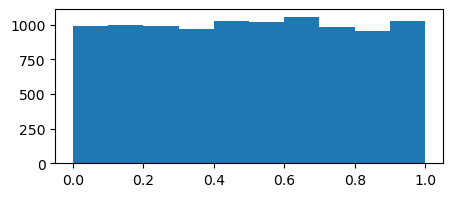

In [116]:
# rand()가 균등분포(최소값~최대값까지 균일한 확률로 난수 발생)에서 난수 발생 확인
import matplotlib.pyplot as plt
x = np.random.rand(10000)
plt.figure(figsize=(5, 2))  # 그래프 크기 figsize=(가로, 세로)
plt.hist(x)
plt.show()

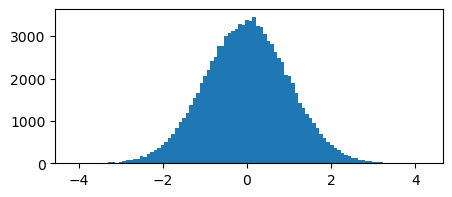

In [119]:
# randn() : 표준정규분포(평균0, 표준편차1인 정규분포)에서 난수 발생
x = np.random.randn(100000)
plt.figure(figsize=(5, 2))  # 그래프 사이즈 조정
plt.hist(x, bins=100)
plt.show()

In [144]:
# 2차원 난수 배열
np.random.random( (2, 5) )  # 2행5열짜리 난수(0이상 1미만의 균등분포 실수 난수) 배열

array([[0.35034619, 0.23854121, 0.48878315, 0.62771167, 0.55051164],
       [0.28116551, 0.26467602, 0.62062231, 0.38742475, 0.87995991]])

In [149]:
np.random.uniform(-2, 10, (2, 5))  # 2행5열짜리 난수(-2부터 10미만의 균등분포 실수난수) 배열

array([[-0.07867622,  5.82079574,  5.53858733,  5.6039235 ,  3.1352784 ],
       [ 9.03455527,  8.39723529, -0.84556482,  5.38704384,  1.71834336]])

In [150]:
np.random.seed(12)  # seed()값을 맞추면 범위 안에서 발생되는 난수가 동일
np.random.normal(-2, 2, (2, 4))  # 2행4열짜리 평균-2, 표준편차2인 정규분포 난수 발생

array([[-1.05402834, -3.36285176, -1.51512101, -5.40147127],
       [-0.49371433, -5.06944268, -1.98974584, -2.24045534]])

In [151]:
# 정수 난수 1개 발생
np.random.randint(45)  # 0부터 44사이의 정수 난수 1개 발생(균등분포)

30

## 2.4 연속된 값을 갖는 배열 만들기
 - np.arange(from, to, by, dtype) : from부터 to앞 까지 by씩 건너뛴 값(to 미포함)을 1차원 배열로 생성
 - np.linspace(from, to, num) : from부터 to(to 포함)까지 num개 숫자들을 1차원 배열로 생성

In [152]:
np.arange(10, 30, 5, dtype=np.float64)

array([10., 15., 20., 25.])

In [155]:
np.arange(0, 2.1, 0.3).reshape(2, 4)  # 2행4열

array([[0. , 0.3, 0.6, 0.9],
       [1.2, 1.5, 1.8, 2.1]])

In [156]:
np.linspace(0, 2, 20)

array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])

In [157]:
np.linspace(0, 2, 20).reshape(4, 5)

array([[0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263],
       [0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842],
       [1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421],
       [1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ]])

In [160]:
# linspace : 많은 수의 점들을 생성할 때 유용
from numpy import linspace, pi
x = linspace(0, 2*pi, 100)
f = np.sin(x)

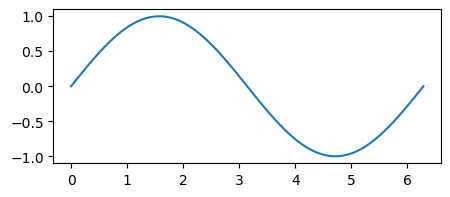

In [161]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 2))
plt.plot(x, f)
plt.show()

## 2.5 배열의 차원 변경하기
 - reshape(행수, 열수) : -1이 올 수 있음
 - resize( (행수, 열수) ) :  -1이 불가
 - T : 전치행렬로 변환
 - transpose() : 전치행렬로 변환
 
※ 실행결과가 출력되면 배열이 수정되지 않고, 실행결과가 없으면 배열이 수정됨

In [164]:
t = np.random.random( (2, 3) )
t

array([[0.94317762, 0.22335928, 0.70293978],
       [0.49994509, 0.20266072, 0.62936457]])

In [167]:
a = np.floor(t*10)
a

array([[9., 2., 7.],
       [4., 2., 6.]])

In [168]:
a = a.astype(np.int16)
a  # 2행 3열 2차원 배열

array([[9, 2, 7],
       [4, 2, 6]], dtype=int16)

In [169]:
a.reshape(3, 2)  # 3행2열로 차원변경

array([[9, 2],
       [7, 4],
       [2, 6]], dtype=int16)

In [170]:
a

array([[9, 2, 7],
       [4, 2, 6]], dtype=int16)

In [173]:
a.reshape(-1, 3) # -1이 주어지면 해당 차원의 크기가 자동 계산됨3

array([[9, 2, 7],
       [4, 2, 6]], dtype=int16)

In [177]:
a.reshape(6, -1)

array([[9],
       [2],
       [7],
       [4],
       [2],
       [6]], dtype=int16)

In [179]:
a.resize(-1, 6)  # 에러

ValueError: negative dimensions not allowed

In [180]:
a

array([[9, 2, 7],
       [4, 2, 6]], dtype=int16)

In [181]:
a.T  # a의 전치행렬 (행과 열을 뒤바꾼 행렬)

array([[9, 4],
       [2, 2],
       [7, 6]], dtype=int16)

In [182]:
a.transpose()  # a의 전치행렬

array([[9, 4],
       [2, 2],
       [7, 6]], dtype=int16)

## 2.6 배열 인쇄

In [196]:
# 배열이 커서 출력이 안 될 경우
print(np.arange(10000))

[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  174  175  176  177  178  179  180  181
  182  183  184  185  186  187  188  189  190  191  192  193  194  195
  196 

In [195]:
np.arange(10000).reshape(100, 100)

array([[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
          44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
          55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
          66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
          77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
          88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
          99],
       [ 100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  14

In [193]:
# 배열이 너무 커서 인쇄할 수 없는 경우는 자동으로 건너뛰고 모서리 부분만 출력
# 넘파이의 인쇄 옵션 변경 (인쇄할 사이즈를 최대치로)
import sys
np.set_printoptions(threshold=10000)  # 배열 10000개까지 출력하도록 옵션 변경
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold=np.inf)  # np.inf : 무한대
# 커널 재시작 시 다시 옵션 복귀

In [194]:
np.arange(10000).reshape(100, 100)

array([[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
          44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
          55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
          66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
          77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
          88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
          99],
       [ 100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  14

In [1]:
import numpy as np
np.arange(10000).reshape(100, 100)

array([[   0,    1,    2, ...,   97,   98,   99],
       [ 100,  101,  102, ...,  197,  198,  199],
       [ 200,  201,  202, ...,  297,  298,  299],
       ...,
       [9700, 9701, 9702, ..., 9797, 9798, 9799],
       [9800, 9801, 9802, ..., 9897, 9898, 9899],
       [9900, 9901, 9902, ..., 9997, 9998, 9999]])

## 2.7 기본 연산 동작
### 1) 배열의 요소별 연산

In [16]:
a = np.array([20,30,40,50])
b = np.arange(4)
print(a)
print(b)

[20 30 40 50]
[0 1 2 3]


In [17]:
a + b  # 요소별 + 연산

array([20, 31, 42, 53])

In [18]:
a ** b

array([     1,     30,   1600, 125000])

In [19]:
a += b  # a = a+b
a

array([20, 31, 42, 53])

In [20]:
a < 40

array([ True,  True, False, False])

In [21]:
# a배열에서 40보다 작은 데이터만 추출하려면 인덱스에서 식을 사용
a[a < 40]

array([20, 31])

In [22]:
a * b  # 요소별 곱

array([  0,  31,  84, 159])

### 2) 행렬의 곱(@, dot함수) cf.*(요소별 곱)

In [23]:
A = np.array([ [1, 1],
               [0, 1]])
B = np.array([ [2, 0],
               [3, 4]])
A, B

(array([[1, 1],
        [0, 1]]),
 array([[2, 0],
        [3, 4]]))

In [26]:
print('요소별 곱 A*B = ', A * B, sep='\n')
print('행렬 곱 A@B = ', A @ B, sep='\n')
print('행렬 곱 A.dot(B) = ', A.dot(B), sep='\n')

요소별 곱 A*B = 
[[2 0]
 [0 4]]
행렬 곱 A@B = 
[[5 4]
 [3 4]]
행렬 곱 A.dot(B) = 
[[5 4]
 [3 4]]


In [36]:
A = np.array([ [1, 0],
               [0, 1]])
B = np.array([ [2, 0],
               [3, 4]])

In [37]:
print('B@단위행렬 = ', B@A, sep='\n')

B@단위행렬 = 
[[2 0]
 [3 4]]


In [38]:
print('단위행렬@B = ', A@B, sep='\n')

단위행렬@B = 
[[2 0]
 [3 4]]


### 3) 복합 대입 연산자 사용(-=, +=, ...)

In [51]:
a = np.ones( (2, 3), dtype=int)  # 2행3열짜리 int32 배열
a

array([[1, 1, 1],
       [1, 1, 1]])

In [52]:
b = np.random.random( (2, 3) )  # 2행3열짜리 float64 배열
b

array([[0.48192337, 0.32454178, 0.04266177],
       [0.59760005, 0.36853362, 0.24921174]])

In [53]:
a += 3  # a = a + 3
a

array([[4, 4, 4],
       [4, 4, 4]])

In [54]:
b += a  # b = b + a : float + int = float
b

array([[4.48192337, 4.32454178, 4.04266177],
       [4.59760005, 4.36853362, 4.24921174]])

In [55]:
a += b  # a = a + b 에러 : int에 float를 더할 순 없음

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

### 4) 배열 요소별 집계
- sum, min, max, mean, var(분산), std(표준편차)

In [56]:
a = np.array([ [2, 2, 2, 3],
               [4, 3, 2, 1]])
a

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [65]:
print('전체 합 : ', a.sum(), '/', np.sum(a))
print('전체 평균 : ', a.mean(), '/', np.mean(a))
print('전체 최소값 : ', a.min(), '/', np.min(a))
print('전체 최대값 : ', a.max(), '/', np.max(a))
print('전체 분산 : ', a.var(), '/', np.var(a))
print('전체 표준편차 : ', a.std(), '/', np.std(a))

전체 합 :  19 / 19
전체 평균 :  2.375 / 2.375
전체 최소값 :  1 / 1
전체 최대값 :  4 / 4
전체 분산 :  0.734375 / 0.734375
전체 표준편차 :  0.8569568250501305 / 0.8569568250501305


### 5) 배열 축별 집계

- 축별 sum, min, max, mean, var(분산), std(표준편차), argmax

In [66]:
a

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [72]:
# axis=(1축(행))들의 합 : 1축(행)을 고정한 열들을 합
print('a 행별 합 : ', a.sum(axis=1), '/', np.sum(a, axis=1))

a 행별 합 :  [ 9 10] / [ 9 10]


In [73]:
# axis=0(0축(열))의 합 : 0축(열)을 고정한 행들의 합
# 2+4 2+3 2+2 3+1
print('a 열별 합 : ', a.sum(axis=0), '/', np.sum(a, axis=0))

a 열별 합 :  [6 5 4 4] / [6 5 4 4]


In [77]:
print('a 행별 최대값 : ', a.max(axis=1), '/', np.max(a, axis=1))
print('a 열별 최대값 : ', a.max(axis=0), '/', np.max(a, axis=0))

a 행별 최대값 :  [3 4] / [3 4]
a 열별 최대값 :  [4 3 2 3] / [4 3 2 3]


In [78]:
a

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [79]:
print('a 행별 최대값 위치 : ', a.argmax(axis=1))

a 행별 최대값 위치 :  [3 0]


In [3]:
# 3차원 배열의 집계
import numpy as np
b = np.arange(24).reshape(2, 3, 4)  # 2면 3행 4열
b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [5]:
# 배열 전제에 대한 집계값
b.sum(), b.min(), b.max(), b.mean(), b.std(), b.var()

(276, 0, 23, 11.5, 6.922186552431729, 47.916666666666664)

In [8]:
np.sum(b), np.min(b), np.max(b), np.mean(b), np.std(b), np.var(b)

(276, 0, 23, 11.5, 6.922186552431729, 47.916666666666664)

In [6]:
# 분산에 루트를 씌우면 표준편차
import math
math.sqrt(b.var())  # math.sqrt() : 스칼라 값에 루트 씌운 값

6.922186552431729

In [9]:
b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [10]:
np.sum(b, axis=0)  # axis=0 : 행과 열은 고정으로 하고, 0축들을 합함 / 0면0행1열 + 1면0행0열

array([[12, 14, 16, 18],
       [20, 22, 24, 26],
       [28, 30, 32, 34]])

In [11]:
np.sum(b, axis=1)  # 면과 열은 고정으로 하고, 1축들을 합함 / 0면0행0열 + 0면1행0열 + 0면2행0열 +0면3행0열

array([[12, 15, 18, 21],
       [48, 51, 54, 57]])

In [12]:
np.sum(b, axis=2)  # 면과 행은 고정으로 하고, 2축들을 합함 / 

array([[ 6, 22, 38],
       [54, 70, 86]])

## 2.8 그 외 요소별로 계산하는 범용함수들

 - 출력인수를 사용하면 메모리를 더 효율적으로 사용할 수 있음(매개변수에 함수 이용)
 
     - np.sqrt(배열) : 제곱근 / math.sqrt(스칼라변수)
     - np.add(A, B, C) : C = np.add(A, B)와 동일 // A, B, C : N차원 배열
     - np.multiply(A, B, C) : C = A * B와 동일
     - np.subtract(A, B, C) : ...

In [16]:
a = np.array([1, 2])
b = np.array([3, 4])
c = np.empty((2))
a, b, c

(array([1, 2]), array([3, 4]), array([1.34869064e-113, 2.32610203e-164]))

In [17]:
# 출력인수 사용
np.add(a, b, c)  # c = np.add(a, b)  # c = a + b
c

array([4., 6.])

In [18]:
a = np.array([1, 4, 9, 16])
# math.sqrt(a) 불가 : 스칼라 변수만 가능
np.sqrt(a)

array([1., 2., 3., 4.])

In [19]:
# 메모리 사용량과 속도를 측정해주는 메모리 프로파일러를 로드
# Anaconda Prompt에서 pip install memory_profiler
%load_ext memory_profiler
A = np.random.randn(100000000)  # 1억개 요소
B = np.random.randn(100000000)
C = np.random.randn(100000000)

In [ ]:
# %%time : 셀을 실행할 때 소요시간 출력
# %memit : 메모리 사용량 출력

In [20]:
%%time
%memit G = A * B + C
print(G)

peak memory: 3818.89 MiB, increment: 1416.94 MiB
[ 0.59359985  1.58191072 -3.12176363 ...  0.48305595 -0.90020407
 -0.52985315]
CPU times: total: 984 ms
Wall time: 2.22 s


In [21]:
%%time
%memit T = A * B; G = T + C; del T
print(G)

peak memory: 4544.37 MiB, increment: 1384.73 MiB
[ 0.59359985  1.58191072 -3.12176363 ...  0.48305595 -0.90020407
 -0.52985315]
CPU times: total: 1.05 s
Wall time: 2.21 s


In [22]:
%%time
%memit G = A * B; G += C
print(G)

peak memory: 3785.61 MiB, increment: 625.95 MiB
[ 0.59359985  1.58191072 -3.12176363 ...  0.48305595 -0.90020407
 -0.52985315]
CPU times: total: 734 ms
Wall time: 1.89 s


In [23]:
# 위와 같음
%%time
%memit np.multiply(A, B, G); np.add(G, C, G)
print(G)

peak memory: 3159.69 MiB, increment: 0.00 MiB
[ 0.59359985  1.58191072 -3.12176363 ...  0.48305595 -0.90020407
 -0.52985315]
CPU times: total: 469 ms
Wall time: 1.63 s


## 2.9 브로드 케스팅
 - 서로 다른 크기의 배열 간 연산을 수행할 수 있도록 해주는 강력한 기능

In [25]:
# 1차원 배열인 경우
a = np.array([1, 2, 3])
b = 10
print(a + b)
print(np.add(a, b))

[11 12 13]
[11 12 13]


In [26]:
# 1차원 배열인 경우
a = np.array([1, 2, 3])
b = np.array([10])
print(a + b)
print(np.add(a, b))

[11 12 13]
[11 12 13]


In [28]:
# 2차원 배열인 경우
a = np.array([ [0, 0, 0],  # 4행 3열짜리 2차원
               [10, 10, 10],
               [20, 20, 20],
               [30, 30, 30]])
b = np.array([0, 1, 2])  # 3열짜리 1차원 배열
np.add(a, b), np.multiply(a, b)

(array([[ 0,  1,  2],
        [10, 11, 12],
        [20, 21, 22],
        [30, 31, 32]]),
 array([[ 0,  0,  0],
        [ 0, 10, 20],
        [ 0, 20, 40],
        [ 0, 30, 60]]))

In [29]:
# 2차원 배열인 경우
a = np.array([ [0, 0, 0],  # 4행 3열짜리 2차원
               [10, 10, 10],
               [20, 20, 20],
               [30, 30, 30]])
b = np.array([ [5], [5], [5], [5] ])  # 4행 1열짜리 2차원 배열
np.add(a, b), np.multiply(a, b)

(array([[ 5,  5,  5],
        [15, 15, 15],
        [25, 25, 25],
        [35, 35, 35]]),
 array([[  0,   0,   0],
        [ 50,  50,  50],
        [100, 100, 100],
        [150, 150, 150]]))

In [30]:
a = np.array([0, 10, 20, 30])
b = np.array([1, 2, 3])

In [31]:
# np.add(a, b)  # 에러 : 브로드 케스팅 불가

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

In [34]:
from numpy import newaxis
# np.newaxis 연산자를 이용하여 배열에 새로운 축을 추가하여 2차원으로 만들기
A = a[:, newaxis]  # 행을 열로 변환
A

array([[ 0],
       [10],
       [20],
       [30]])

In [35]:
print(A + b)
print(np.add(A, b))

[[ 1  2  3]
 [11 12 13]
 [21 22 23]
 [31 32 33]]
[[ 1  2  3]
 [11 12 13]
 [21 22 23]
 [31 32 33]]


# 3절. 배열 합치기 / 배열 분리하기
 - 슬라이싱
 - 두 배열을 합치는 함수
 - r_, c_ 객체를 이용해 합치기
 - 하나의 배열을 여러 개 작은 배열로 분리하는 함수

## 3.1 인덱싱과 슬라이싱
 - 교안 pdf p.31
    - [인덱싱 docs](https://docs.scipy.org/doc/numpy/user/basics.indexing.html)
    - [배열 인덱싱 docs](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html)
    - [newaxis](https://docs.scipy.org/doc/numpy/reference/constants.html#numpy.newaxis)

In [36]:
a = np.arange(10)*3
a

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])

In [39]:
# 인데싱 : 없는 인덱싱 사용 시 에러
a[2], a[-1]

(6, 27)

In [38]:
a[10]

IndexError: index 10 is out of bounds for axis 0 with size 10

In [40]:
# 슬라이싱 : 없는 인덱스 값도 가능
a[1:9:2]

array([ 3,  9, 15, 21])

In [41]:
a

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])

In [42]:
a[::2] = 99
a

array([99,  3, 99,  9, 99, 15, 99, 21, 99, 27])

In [43]:
a[:100]

array([99,  3, 99,  9, 99, 15, 99, 21, 99, 27])

In [45]:
b = np.arange(20).reshape(5, 4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [47]:
b[1,2]

6

In [50]:
b[:, 0:-1]  # 모든 행의 마지막 열 앞까지(종속변수를 제외하는 용도=독립변수 추출하는 용도)

array([[ 0,  1,  2],
       [ 4,  5,  6],
       [ 8,  9, 10],
       [12, 13, 14],
       [16, 17, 18]])

In [51]:
b[:, -1]  # 모든 행의 마지막 열만 추출(종속변수 추출하는 용도)  # 뒤에 [:, newaxis] 사용 시 세로로 정렬됨

array([ 3,  7, 11, 15, 19])

In [52]:
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [60]:
# 0~1행까지 모든 열 추축 (열 생략 시 모든 열 추출)
b[0:2, :], b[0:2, ], b[0:2], b[0:2, ...]

(array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[0, 1, 2, 3],
        [4, 5, 6, 7]]))

In [62]:
# 전체 행의 맨 마지막 열만 추출
# 선행 축은 생략 불가
b[:, -1], b[..., -1]

(array([ 3,  7, 11, 15, 19]), array([ 3,  7, 11, 15, 19]))

In [64]:
# 모든 행의 마지막 열을 추출해서 2차원으로 변경(5열 -> 5행1열)
b[:, -1][:, newaxis]  # 1행 -> 1열

array([[ 3],
       [ 7],
       [11],
       [15],
       [19]])

In [65]:
b[..., -1].reshape(5, 1)

array([[ 3],
       [ 7],
       [11],
       [15],
       [19]])

In [66]:
b[..., -1:]

array([[ 3],
       [ 7],
       [11],
       [15],
       [19]])

In [67]:
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [70]:
b[1:4, 1:-1], b[1:-1, 1:-1], b[1:4, 1:3]

(array([[ 5,  6],
        [ 9, 10],
        [13, 14]]),
 array([[ 5,  6],
        [ 9, 10],
        [13, 14]]),
 array([[ 5,  6],
        [ 9, 10],
        [13, 14]]))

In [71]:
# 3차원 배열의 인덱싱, 슬라이싱
c = np.arange(24).reshape(2, 3, 4)  # 2면 3행 4열짜리 3차원
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [72]:
c[1, 1, 1]

17

In [75]:
# 선행축은 생략 불가, 후행축은 생략 가능
# 0면
c[0], c[0, ], c[0, ...]

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]))

In [78]:
# 1면 0행의 모든 열
c[1, 0, :], c[1, 0, ], c[1, 0, ...]

(array([12, 13, 14, 15]), array([12, 13, 14, 15]), array([12, 13, 14, 15]))

In [80]:
# 1면 모든 행의 1열
c[1, ..., 1], c[1, :, 1], c[1]

(array([13, 17, 21]), array([13, 17, 21]))

In [81]:
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [83]:
c[:, 0:2, 1:3], c[:, :2, 1:3]

(array([[[ 1,  2],
         [ 5,  6]],
 
        [[13, 14],
         [17, 18]]]),
 array([[[ 1,  2],
         [ 5,  6]],
 
        [[13, 14],
         [17, 18]]]))

## 3.2 두 배열을 쌓아 합치는 함수
 **- vstack(tup) : 아래에 추가하는 방식으로 쌓아 합침**<br>
 **- hstack(tup) : 옆으로 추가하는 방식으로 합침**<br>
 **- dstack(tup) : 마지막 축(열)을 쌓아 합침. depth방향으로 합치는 함수(차원증가)**

In [86]:
c = np.array([1, 2, 3])
d = np.array([4, 5, 6])
v = np.vstack( (c, d) )
print('vstack 아래로 합치기 : ', v, v.shape, sep='\n')
h = np.hstack( (c, d) )
print('hstack 옆으로 합치기 : ', h, h.shape, sep='\n')
d = np.dstack( (c, d) )
print('dstack 축을 depth로 합치기 : ', d, d.shape, sep='\n')

vstack 아래로 합치기 : 
[[1 2 3]
 [4 5 6]]
(2, 3)
hstack 옆으로 합치기 : 
[1 2 3 4 5 6]
(6,)
dstack 축을 depth로 합치기 : 
[[[1 4]
  [2 5]
  [3 6]]]
(1, 3, 2)


In [87]:
c = np.arange(24).reshape(2, 3, 4)
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [89]:
a, b = c[0], c[1]  # a = c의 0면, b = c의 1면
a, b

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [90]:
# 수직으로 합치기
np.vstack( (a, b) )  # 2차원

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [93]:
np.concatenate( (a, b), axis=0 )  # 2차원(위와 같은 출력) / axis=0 : 기본값

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [94]:
np.concatenate( (a, b), axis=1 )  # 2차원(위와 같은 출력) / axis=0 : 기본값

array([[ 0,  1,  2,  3, 12, 13, 14, 15],
       [ 4,  5,  6,  7, 16, 17, 18, 19],
       [ 8,  9, 10, 11, 20, 21, 22, 23]])

In [95]:
# 옆으로 합치기
np.hstack( (a, b) )  # 위와 같은 출력

array([[ 0,  1,  2,  3, 12, 13, 14, 15],
       [ 4,  5,  6,  7, 16, 17, 18, 19],
       [ 8,  9, 10, 11, 20, 21, 22, 23]])

In [99]:
a, b  # 마지막 축(열)끼리 쌓아 면을 이룸 (2차원 배열을 dstack하면 3차원 배열로 됨)

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [100]:
np.dstack( (a, b) )

array([[[ 0, 12],
        [ 1, 13],
        [ 2, 14],
        [ 3, 15]],

       [[ 4, 16],
        [ 5, 17],
        [ 6, 18],
        [ 7, 19]],

       [[ 8, 20],
        [ 9, 21],
        [10, 22],
        [11, 23]]])

- column_stack(tup) : 1차원 배열을 2차원 배열의 열단위로 합침
- row_stack(tup) : 행단위로 합침 == vstack()

In [101]:
a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7, 8])
c = np.array([9, 10, 11, 12])
np.column_stack( (a, b, c) )

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [102]:
np.hstack( (a, b, c) )

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [106]:
np.hstack( (a[:, newaxis], b[:, newaxis], c[:, newaxis]) )

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [107]:
np.row_stack( (a, b, c) )

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [108]:
np.vstack( (a, b, c) )

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

- stack(tup, axis=n) : axis 속성에 따라 배열을 합침. axis 음수차원이 가능함.
    - axis=0 : 첫 번째 차원, axis=-1 : 마지막 차원(열)

In [110]:
a = np.arange(12).reshape(3, 4)
b = np.arange(12, 24).reshape(3, 4)
a, b

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [111]:
np.stack( (a, b), axis=0 )  # 0면에 a, 1면에 b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [112]:
np.stack( (a, b), axis=1 )  # 행(1축)끼리 합쳐 면을 이룸

array([[[ 0,  1,  2,  3],
        [12, 13, 14, 15]],

       [[ 4,  5,  6,  7],
        [16, 17, 18, 19]],

       [[ 8,  9, 10, 11],
        [20, 21, 22, 23]]])

In [114]:
np.stack( (a, b), axis=2 )  # -1도 가능 : 열끼리 합쳐서 면을 이룸

array([[[ 0, 12],
        [ 1, 13],
        [ 2, 14],
        [ 3, 15]],

       [[ 4, 16],
        [ 5, 17],
        [ 6, 18],
        [ 7, 19]],

       [[ 8, 20],
        [ 9, 21],
        [10, 22],
        [11, 23]]])

## 3.3 r_, c_
 - 나열 객체

In [115]:
a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7, 8])
c = np.array([9, 10, 11, 12])

In [116]:
np.r_[a, b, c]  # 한 행으로 나열

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [118]:
np.r_[[a], [b], [c]]  # 2차원

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [117]:
np.c_[a, b, c]  # 열로 나열

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [119]:
np.column_stack( (a, b, c) )

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

## 3.4 배열을 분리하는 함수
 - vsplit(ary, 정수나 벡터) : 첫 번째 축(2차원의 경우 가로축:행)을 따라 분할
 - hsplit(ary, 정수나 벡터) : 두 번째 축(2차원의 경우 세로축:열)을 따라 분할
 - dsplit(ary, 정수나 벡터) : depth를 따라 나눔. 3차원 이상에서만 동작
 
     * 정수 n : n개로 분리
     * [n] : n번째 인덱스를 기점으로 분리
     * [n, m, ...] : n번째, m번째 인덱스를 기점으로 분리

In [120]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [122]:
# 가로축을 따라 3개로 배열 분할. 분할 후에는 원래의 차원을 유지
a_vsplit = np.vsplit(a, 3)  # a_vsplit = np.vsplit(a, 2) 에러 : 3행을 2개로 분리하므로
a_vsplit

[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]

In [124]:
a_vsplit = np.vsplit(a, [2])  # 2는 분할 기점이 될 인덱스
a_vsplit

[array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[ 8,  9, 10, 11]])]

In [125]:
a_vsplit = np.vsplit(a, [1, 2])  # 1, 2는 분할 기점이 될 인덱스
a_vsplit

[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]

In [128]:
a_vsplit[0].ndim, a_vsplit[1].ndim, a_vsplit[2].ndim  # 분할 후 차원 수 유지

(2, 2, 2)

In [130]:
np.hsplit(a, 2), np.hsplit(a, 4)

([array([[0, 1],
         [4, 5],
         [8, 9]]),
  array([[ 2,  3],
         [ 6,  7],
         [10, 11]])],
 [array([[0],
         [4],
         [8]]),
  array([[1],
         [5],
         [9]]),
  array([[ 2],
         [ 6],
         [10]]),
  array([[ 3],
         [ 7],
         [11]])])

In [131]:
np.hsplit(a, 3)  # 에러

ValueError: array split does not result in an equal division

In [132]:
# dsplit은 3차원 이상만 가능
b = np.arange(24).reshape(2, 3, 4)
b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [134]:
b_vsplit = np.vsplit(b, 2)  # 첫 번째 축을 기준으로 2개로 분할
b_vsplit

[array([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]]),
 array([[[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])]

In [135]:
b_hsplit = np.hsplit(b, 3)  # 3행이므로 짝수로 분리하면 에러
b_hsplit

[array([[[ 0,  1,  2,  3]],
 
        [[12, 13, 14, 15]]]),
 array([[[ 4,  5,  6,  7]],
 
        [[16, 17, 18, 19]]]),
 array([[[ 8,  9, 10, 11]],
 
        [[20, 21, 22, 23]]])]

In [136]:
b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [138]:
np.dsplit(b, 2)  # 열을 기준으로 2개로 나눔 (4행이므로 홀수로 분리하면 에러)

[array([[[ 0,  1],
         [ 4,  5],
         [ 8,  9]],
 
        [[12, 13],
         [16, 17],
         [20, 21]]]),
 array([[[ 2,  3],
         [ 6,  7],
         [10, 11]],
 
        [[14, 15],
         [18, 19],
         [22, 23]]])]

- split(ary, 갯수나 인덱스 벡터, axis=?)
    * axis=0 : vsplit()과 동일
    * axis=1 : hsplit()과 동일
    * axis=2 : 3차원 이상에서만 동작. dsplit()과 동일
- array_split(ary, 갯수나 인덱스 벡터, axis=?)
    * split()과 차이점은 나눠지지 않는 정수로도 사용 가능

In [139]:
a = np.arange(20).reshape(2, 10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [140]:
np.split(a, 2, axis=1)

[array([[ 0,  1,  2,  3,  4],
        [10, 11, 12, 13, 14]]),
 array([[ 5,  6,  7,  8,  9],
        [15, 16, 17, 18, 19]])]

In [142]:
# np.split(a, 3, axis=1)  # 에러
np.array_split(a, 3, axis=1)

[array([[ 0,  1,  2,  3],
        [10, 11, 12, 13]]),
 array([[ 4,  5,  6],
        [14, 15, 16]]),
 array([[ 7,  8,  9],
        [17, 18, 19]])]